<a href="https://colab.research.google.com/github/tanjinadnanabir/qbosons-hackathon-qiskit-fall-fest-kolkata-2022/blob/main/iris_classification_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris/Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# shape checking
dataset.shape

(150, 6)

In [ ]:
# to display stats about data
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# to basic info about datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# to display no. of samples on each class
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Null/ missing values and percentage checking
def nullValueCheck(n):
  nullValues = n.isnull().sum()
  percentage = nullValues * 100 / len(n)
  print(percentage)

In [ ]:
nullValueCheck(dataset)

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


In [ ]:
# droping columns with higher missing values (above 70%) || Same values || from correlation matrix
dataset = dataset.drop('Id', 1)

In [ ]:
# to display stats about data
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# to basic info about datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# to display no. of samples on each class
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
dataset.shape

(150, 5)

In [ ]:
# iterating the columns 
for col in dataset.columns: 
    print(col)

SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


# Exploratory Data Analysis

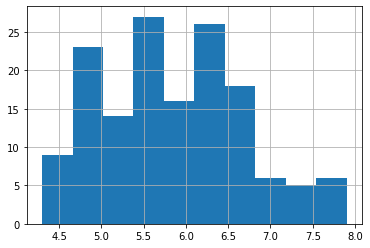

In [ ]:
# histograms
dataset['SepalLengthCm'].hist()

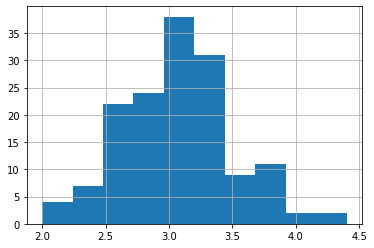

In [ ]:
dataset['SepalWidthCm'].hist()

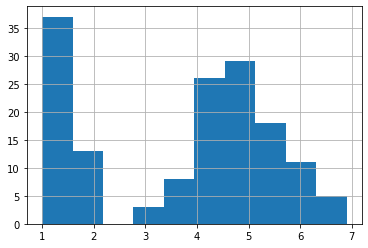

In [ ]:
dataset['PetalLengthCm'].hist()

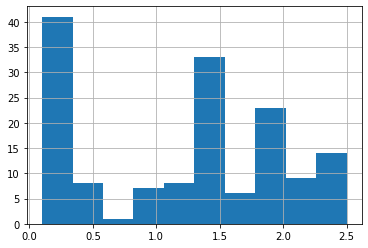

In [ ]:
dataset['PetalWidthCm'].hist()

In [ ]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

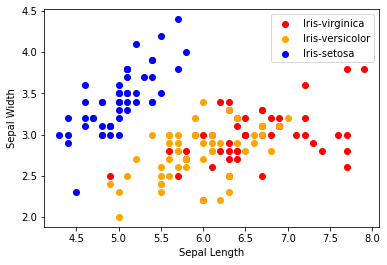

In [ ]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

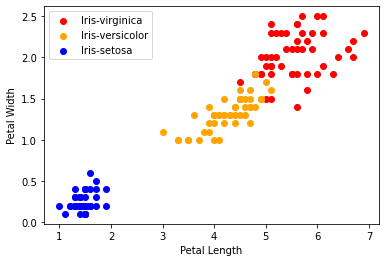

In [ ]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

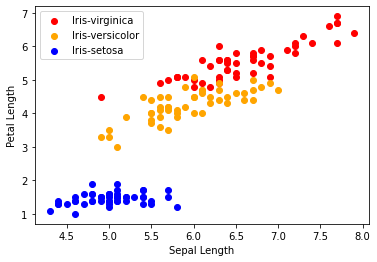

In [ ]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

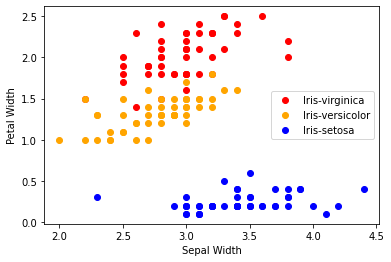

In [ ]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [ ]:
# Feature correlation
def featureCorrelation(s):
  import seaborn as sn
  import matplotlib.pyplot as plt
  sn.set(font_scale=1.3)
  sn.set_style("darkgrid")
  fig_dims = (10, 4)
  fig, ax = plt.subplots(figsize=fig_dims)
  sn.heatmap(s.corr(), annot=True, ax=ax)
  plt.show()

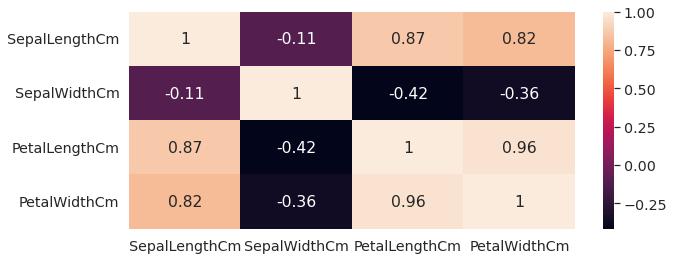

In [ ]:
featureCorrelation(dataset)

# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dataset['Species'] = le.fit_transform(dataset['Species'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


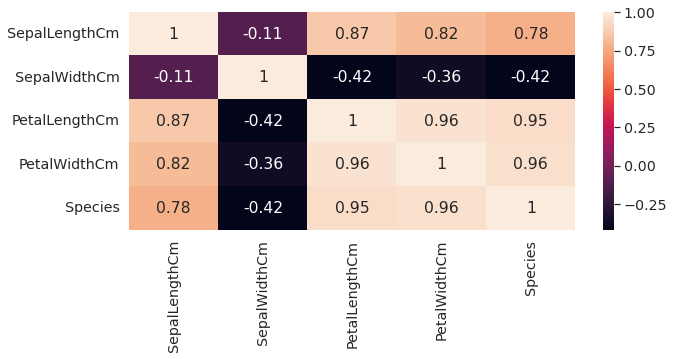

In [ ]:
featureCorrelation(dataset)

In [ ]:
# cor = dataset.corr()

In [ ]:
# cor.to_csv("/content/drive/MyDrive/Colab Notebooks/iris/corr-mat.csv")

In [ ]:
# creating X Y variables
max_len = len(dataset.columns)-1
min_len = 0
max = len(dataset.columns)

X = dataset.iloc[:,min_len:max_len].values
x = dataset.iloc[:,min_len:max_len]

y = dataset.iloc[:,max_len].values
y_name = dataset.iloc[:, max_len:max]

print("X shape:",x.shape)
print("y shape:",y_name.shape)

X shape: (150, 4)
y shape: (150, 1)


In [ ]:
# iterating the columns 
def iteratingColumn(n):
  print("Attributes:\n")
  for col in x.columns: 
      print(col)

  print("\n")
  print("Class:\n")
  for col in y_name.columns: 
      print(col)

In [ ]:
iteratingColumn(dataset)

Attributes:

SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm


Class:

Species


#  Spliting the Dataset into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
print(X_train)

[[5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.7 2.1]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [4.9 3.  1.4 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.

In [ ]:
print(y_train)

[1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


In [ ]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
len(X), len(y)

(150, 150)

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# LightGBM

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgbm
param_grid = {
              'colsample_bytree' : [0.1,0.2,0.3,0.4,0.5,1.0],
              'max_depth' : [1,2,3,4,5], 
              'min_split_gain' : [0.1,0.2,0.3,0.4,0.5],
              'n_estimators' : [1,10,100],
              'num_leaves' :  [100,200],
              'subsample_freq' : [0,5,10,15,20]
              }

In [ ]:
print(param_grid)

{'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0], 'max_depth': [1, 2, 3, 4, 5], 'min_split_gain': [0.1, 0.2, 0.3, 0.4, 0.5], 'n_estimators': [1, 10, 100], 'num_leaves': [100, 200], 'subsample_freq': [0, 5, 10, 15, 20]}


In [ ]:
lgbm_clf = lgbm.LGBMClassifier()
lgbm_clf_cv = GridSearchCV(lgbm_clf, param_grid, cv=10, verbose=2, n_jobs=-1)
print(lgbm_clf_cv)

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_split_gain': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [1, 10, 100], 'num_leaves': [100, 200],
                         'subsample_freq': [0, 5, 10, 15, 20]},
             verbose=2)


In [ ]:
lgbm_clf_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",lgbm_clf_cv.best_params_)
print("\n")
print("accuracy :",lgbm_clf_cv.best_score_)

Fitting 10 folds for each of 4500 candidates, totalling 45000 fits
tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.5, 'max_depth': 2, 'min_split_gain': 0.4, 'n_estimators': 100, 'num_leaves': 100, 'subsample_freq': 0}


accuracy : 0.9618181818181819


In [ ]:
lgbm_clf = lgbm.LGBMClassifier(colsample_bytree = 1.0, max_depth = 4, min_split_gain = 0.3, n_estimators = 100, num_leaves = 100, subsample_freq = 0)

In [ ]:
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(max_depth=4, min_split_gain=0.3, num_leaves=100)

In [ ]:
y_pred_lgbm = lgbm_clf.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_lgbm)
print(cm_svm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
ac  = accuracy_score(y_test, y_pred_lgbm)
pre = precision_score(y_test, y_pred_lgbm, average = 'micro')
re  = recall_score(y_test, y_pred_lgbm, average = 'micro')
f1  = f1_score(y_test, y_pred_lgbm, average = 'micro')

In [ ]:
print("Summary of LGBM")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of LGBM
Accuracy    = 0.9777777777777777
Precison    = 0.9777777777777777
Recall      = 0.9777777777777777
f1 score    = 0.9777777777777777


# GradientBoostingClassifier

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion' : ['friedman_mse', 'squared_error', 'mse'],
              'learning_rate' : [0.1,0.2,0.3,0.4,0.5,1.0],
              'loss' : ['log_loss', 'deviance', 'exponential'],
              'max_depth' : [1,2,3,4,5],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_estimators' : [1,10,100]
              }

In [ ]:
print(param_grid)

{'criterion': ['friedman_mse', 'squared_error', 'mse'], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0], 'loss': ['log_loss', 'deviance', 'exponential'], 'max_depth': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [1, 10, 100]}


In [ ]:
grad_clf = GradientBoostingClassifier()
grad_clf_cv = GridSearchCV(grad_clf, param_grid, cv = 10, verbose = 2, n_jobs = -1)
print(grad_clf_cv)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 10, 100]},
             verbose=2)


In [ ]:
grad_clf_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ", grad_clf_cv.best_params_)
print("\n")
print("accuracy :",grad_clf_cv.best_score_)

Fitting 10 folds for each of 2430 candidates, totalling 24300 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 1}


accuracy : 0.9709090909090909


In [ ]:
grad_clf = GradientBoostingClassifier(criterion = 'friedman_mse', n_estimators = 1, learning_rate = 0.1, loss = 'deviance', max_depth = 3, max_features = 'auto')
grad_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=1)

In [ ]:
y_pred_grad = grad_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_grad))
print(classification_report(y_test,y_pred_grad))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
ac  = accuracy_score(y_test, y_pred_grad)
pre = precision_score(y_test, y_pred_grad, average = 'micro')
re  = recall_score(y_test, y_pred_grad, average = 'micro')
f1  = f1_score(y_test, y_pred_grad, average = 'micro')

In [ ]:
print("Summary of GBC")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of GBC
Accuracy    = 0.9777777777777777
Precison    = 0.9777777777777777
Recall      = 0.9777777777777777
f1 score    = 0.9777777777777777


# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate' : [0.1,0.2,0.3,0.4,0.5,1.0],
              'n_estimators' : [50,100],
              'algorithm' : ['SAMME', 'SAMME.R'],
              'random_state' : [0]
              }

In [ ]:
print(param_grid)

{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0], 'n_estimators': [50, 100], 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': [0]}


In [ ]:
ada_clf = AdaBoostClassifier()
ada_clf_cv = GridSearchCV(ada_clf,param_grid,cv=10,verbose=2,n_jobs=-1)
print(ada_clf_cv)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
                         'n_estimators': [50, 100], 'random_state': [0]},
             verbose=2)


In [ ]:
ada_clf_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",ada_clf_cv.best_params_)
print("\n")
print("accuracy :",ada_clf_cv.best_score_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
tuned hpyerparameters :(best parameters)  {'algorithm': 'SAMME.R', 'learning_rate': 0.4, 'n_estimators': 100, 'random_state': 0}


accuracy : 0.9542041248016921


In [ ]:
ada_clf = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.5, n_estimators = 100, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=0)

In [ ]:
y_pred_ada = ada_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_ada))
print(classification_report(y_test,y_pred_ada))

[[1]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_ada)
pre = precision_score(y_test, y_pred_ada, average = 'macro')
re  = recall_score(y_test, y_pred_ada, average = 'macro')
f1  = f1_score(y_test, y_pred_ada, average = 'macro')

In [ ]:
print("Summary of AdaBC")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of AdaBC
Accuracy    = 0.9512195121951219
Precison    = 0.9519893899204244
Recall      = 0.9507936507936507
f1 score    = 0.9511387711864407


# KNN



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
              "weights": ["uniform", "distance"],
              "metric":["minkowski","euclidean", "manhattan"],
              'p':[1,2]
              }

In [ ]:
print(param_grid)

{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'p': [1, 2]}


In [ ]:
classifier_knn    = KNeighborsClassifier()
classifier_knn_cv = GridSearchCV(classifier_knn,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_knn_cv)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=2)


In [ ]:
classifier_knn_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_knn_cv.best_params_)
print("\n")
print("accuracy :",classifier_knn_cv.best_score_)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits
tuned hpyerparameters :(best parameters)  {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


accuracy : 0.9627272727272727


In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 5, p= 2, weights='uniform')

In [ ]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

In [ ]:
print(y_pred_knn)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn, average = 'micro')
re  = recall_score(y_test, y_pred_knn, average = 'micro')
f1  = f1_score(y_test, y_pred_knn, average = 'micro')

In [ ]:
print("Summary of KNN")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of KNN
Accuracy    = 0.9777777777777777
Precison    = 0.9777777777777777
Recall      = 0.9777777777777777
f1 score    = 0.9777777777777777


# SVM




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [1,2,3,4,5],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              'degree': [1,2,3,4,5],
              "probability" : [True]
              }

In [ ]:
print(param_grid)

{'C': [1, 2, 3, 4, 5], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5], 'probability': [True]}


In [ ]:
classifier_svm    = SVC()
classifier_svm_cv = GridSearchCV(classifier_svm,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_svm_cv)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5], 'degree': [1, 2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True]},
             verbose=2)


In [ ]:
classifier_svm_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_svm_cv.best_params_)
print("\n")
print("accuracy :",classifier_svm_cv.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
tuned hpyerparameters :(best parameters)  {'C': 3, 'degree': 3, 'kernel': 'poly', 'probability': True}


accuracy : 0.9536363636363635


In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(C = 3, degree = 1, kernel = 'poly', probability=True)

In [ ]:
classifier_svm.fit(X_train, y_train)

SVC(C=3, degree=1, kernel='poly', probability=True)

In [ ]:
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
ac  = accuracy_score(y_test, y_pred_svm)
pre = precision_score(y_test, y_pred_svm, average='micro')
re  = recall_score(y_test, y_pred_svm, average='micro')
f1  = f1_score(y_test, y_pred_svm, average='micro')

In [ ]:
print("Summary of SVM")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of SVM
Accuracy    = 0.9777777777777777
Precison    = 0.9777777777777777
Recall      = 0.9777777777777777
f1 score    = 0.9777777777777777


# LR




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
              'random_state' : [0,1,2,3,4,5],
              'C': [0.001,0.1,0.2,0.3,0.4,0.5,1],
              "penalty" : ["l1", "l2", "elasticnet", "none"],
              "dual" : [True],
              "fit_intercept" : [True],
              "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "multi_class" : ["auto", "ovr", "multinomial"],
              }

In [ ]:
print(param_grid)

{'random_state': [0, 1, 2, 3, 4, 5], 'C': [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 1], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'dual': [True], 'fit_intercept': [True], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'multi_class': ['auto', 'ovr', 'multinomial']}


In [ ]:
classifier_log = LogisticRegression()
classifier_log_cv = GridSearchCV(classifier_log,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_log_cv)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
                         'dual': [True], 'fit_intercept': [True],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)


In [ ]:
classifier_log_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_log_cv.best_params_)
print("\n")
print("accuracy :",classifier_log_cv.best_score_)

Fitting 10 folds for each of 2520 candidates, totalling 25200 fits
tuned hpyerparameters :(best parameters)  {'C': 0.5, 'dual': True, 'fit_intercept': True, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


accuracy : 0.8872727272727273


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(C = 1, random_state=0, dual = True, fit_intercept=True, multi_class= 'auto', penalty = 'l2', solver = 'liblinear')

In [ ]:
classifier_log.fit(X_train, y_train)

LogisticRegression(C=1, dual=True, random_state=0, solver='liblinear')

In [ ]:
# Predicting the Test set results
y_pred_log = classifier_log.predict(X_test)

In [ ]:
print(y_pred_log)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 2 0 0 2 0 0 1 1 0 2 2 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

[[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
ac  = accuracy_score(y_test, y_pred_log)
pre = precision_score(y_test, y_pred_log, average = 'micro')
re  = recall_score(y_test, y_pred_log, average = 'micro')
f1  = f1_score(y_test, y_pred_log, average = 'micro')

In [ ]:
print("Summary of LR")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of LR
Accuracy    = 0.9512195121951219
Precison    = 0.9655172413793104
Recall      = 0.9333333333333333
f1 score    = 0.9491525423728815


# DT




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
              "criterion" : ["gini", "entropy"],
              "splitter" : ["best", "random"],
              'max_depth' : [0,1,2,3,4,5,6,7,8,9,10],
              "max_features" : ["auto", "sqrt", "log2"],
              'max_leaf_nodes' : [0,1,2,3,4,5,6,7,8,9,10,11,12,13],
              'min_samples_split' : [0,1,2,3,4,5,6,7,8,9]
              }

In [ ]:
print(param_grid)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'min_samples_split': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [ ]:
classifier_dt = DecisionTreeClassifier()
classifier_dt_cv = GridSearchCV(classifier_dt,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_dt_cv)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                            11, 12, 13],
                         'min_samples_split': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=2)


In [ ]:
classifier_dt_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_dt_cv.best_params_)
print("\n")
print("accuracy :",classifier_dt_cv.best_score_)

Fitting 10 folds for each of 18480 candidates, totalling 184800 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_split': 9, 'splitter': 'best'}


accuracy : 0.8957482993197278


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_features = 'sqrt', max_leaf_nodes = 12, min_samples_split = 3, splitter = 'best')

In [ ]:
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', max_leaf_nodes=12,
                       min_samples_split=3)

In [ ]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
print(y_pred_dt)

[0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0.]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_dt)
print(cm_svm)

[[59  4]
 [ 7 53]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
ac  = accuracy_score(y_test, y_pred_dt)
pre = precision_score(y_test, y_pred_dt, average = 'micro')
re  = recall_score(y_test, y_pred_dt, average = 'micro')
f1  = f1_score(y_test, y_pred_dt, average = 'micro')

In [ ]:
print("Summary of DT")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of DT
Accuracy    = 0.9105691056910569
Precison    = 0.9298245614035088
Recall      = 0.8833333333333333
f1 score    = 0.905982905982906


# RF




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
              'criterion' : ['gini', 'entropy', 'log_loss'],
              'max_depth' : [0,1,2,3,4,5,6,7,8,9,10],
              'max_features' : ['sqrt', 'log2'],
              'random_state' : [0,1,2,3,4,5],
              'n_estimators' : [1,2,3,4,5,6,7,8,9,10],
              }

In [ ]:
print(param_grid)

{'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': ['sqrt', 'log2'], 'random_state': [0, 1, 2, 3, 4, 5], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
classifier_rf = RandomForestClassifier()
classifier_rf_cv = GridSearchCV(classifier_rf,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_rf_cv)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [0, 1, 2, 3, 4, 5]},
             verbose=2)


In [ ]:
classifier_rf_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_rf_cv.best_params_)
print("\n")
print("accuracy :",classifier_rf_cv.best_score_)

Fitting 10 folds for each of 3960 candidates, totalling 39600 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 10, 'random_state': 3}


accuracy : 0.9611394557823131


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'gini', max_depth = 9, max_features = 'sqrt', n_estimators = 10, random_state = 3)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=10,
                       random_state=3)

In [ ]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
print(y_pred_rf)

[0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0.]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[61  2]
 [ 2 58]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
ac  = accuracy_score(y_test, y_pred_rf)
pre = precision_score(y_test, y_pred_rf, average = 'micro')
re  = recall_score(y_test, y_pred_rf, average = 'micro')
f1  = f1_score(y_test, y_pred_rf, average = 'micro')

In [ ]:
print("Summary of RF")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of RF
Accuracy    = 0.967479674796748
Precison    = 0.9666666666666667
Recall      = 0.9666666666666667
f1 score    = 0.9666666666666667


# MLP

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
param_grid = {
              'hidden_layer_sizes' : [(10, 10, 10)], 
              "activation" : ["identity", "logistic", "tanh", "relu"],
              "solver" : ["lbfgs", "sgd", "adam"],
              'alpha' : [0.0001, 0.05],
              "learning_rate" : ["constant", "invscaling", "adaptive"]
              }

In [ ]:
print(param_grid)

{'hidden_layer_sizes': [(10, 10, 10)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'invscaling', 'adaptive']}


In [ ]:
mlp = MLPClassifier()
mlp_cv = GridSearchCV(mlp, param_grid, cv=10, verbose=2, n_jobs=-1)
print(mlp_cv)

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 10, 10)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)


In [ ]:
mlp_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",mlp_cv.best_params_)
print("\n")
print("accuracy :",mlp_cv.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
tuned hpyerparameters :(best parameters)  {'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


accuracy : 0.9709090909090909


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation = 'identity', alpha = 0.05, hidden_layer_sizes = (10, 10, 10), learning_rate = 'adaptive', solver = 'adam') 
# hidden_layer_sizes=(10, 10, 10), max_iter=1000

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='identity', alpha=0.05,
              hidden_layer_sizes=(10, 10, 10), learning_rate='adaptive')

In [ ]:
# Predicting the Test set results
y_pred_mlp = mlp.predict(X_test)

In [ ]:
print(y_pred_mlp)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print(cm_mlp)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
ac  = accuracy_score(y_test, y_pred_mlp)
pre = precision_score(y_test, y_pred_mlp, average = 'micro')
re  = recall_score(y_test, y_pred_mlp, average = 'micro')
f1  = f1_score(y_test, y_pred_mlp, average = 'micro')

In [ ]:
print("Summary of MLP")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of MLP
Accuracy    = 0.9777777777777777
Precison    = 0.9777777777777777
Recall      = 0.9777777777777777
f1 score    = 0.9777777777777777
